The formulas for phi double dot was derivived from the euler-lagrange equations. The lagrangian was: $0.5(m_1+m_2)L_{1}^2\dot\phi_{1}^2+m_{2}L_{1}L_{2}\dot\phi_{1}\dot\phi_{2}cos(\phi_{1}-\phi_{2})+0.5m_{2}L_{2}^2\dot\phi_{2}^2-(m_1+m_2)gL_{1}(1-cos(\phi_{1}))-m_{2}gL_{2}(1-cos(\phi_{2}))$ 

After taking the derivitives, we end up with 2 equations. rearranging these equations to solve for phi1 and phi2 double dot gets us the equations that are used below

In [38]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [39]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

In [ ]:
# y0 = [x1, x1_dot, x2, x2_dot]

In [40]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L : float
        length of the simple pendulum
    g : float
        gravitational acceleration at the earth's surface
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    mass : float
        mass of pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.):
        
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
        self.B = m2/(m1+m2)
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
            
        Returns
        -------
        
        """
        C = np.cos(y[0]-y[2])
        S = np.sin(y[0]-y[2])
        E = y[1] - y[3]
        D = y[1]*y[3]
        B = self.B
        L1 = self.L1
        L2 = self.L2
        g = self.g
        denom = 1 - B*C**2
        
        phi1_dot = y[1]
        phi1_double_dot = (-B*(L2/L1)*D*S - (g/L1)*np.sin(y[0]) + B*(L2/L1)*y[3]*S*E - B*D*S*C + B*(g/L1)*C*np.sin(y[2]) - B*y[1]*S*C*E)/denom
        
        phi2_dot = y[3]
        phi2_double_dot = ((L1/L2)*D*S - (g/L2)*np.sin(y[2]) + (L1/L2)*S*E*y[1] + B*D*S*C + (g/L2)*C*np.sin(y[0]) - B*y[3]*S*C*E)/denom
        
        return [phi1_dot, phi1_double_dot , phi2_dot, phi2_double_dot]
    
    def solve_ode(self, t_pts, y0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = y0
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot

In [41]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [42]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L = 1.
g = 1.
mass = 1.

# Instantiate a pendulum 
p1 = DoublePendulum()

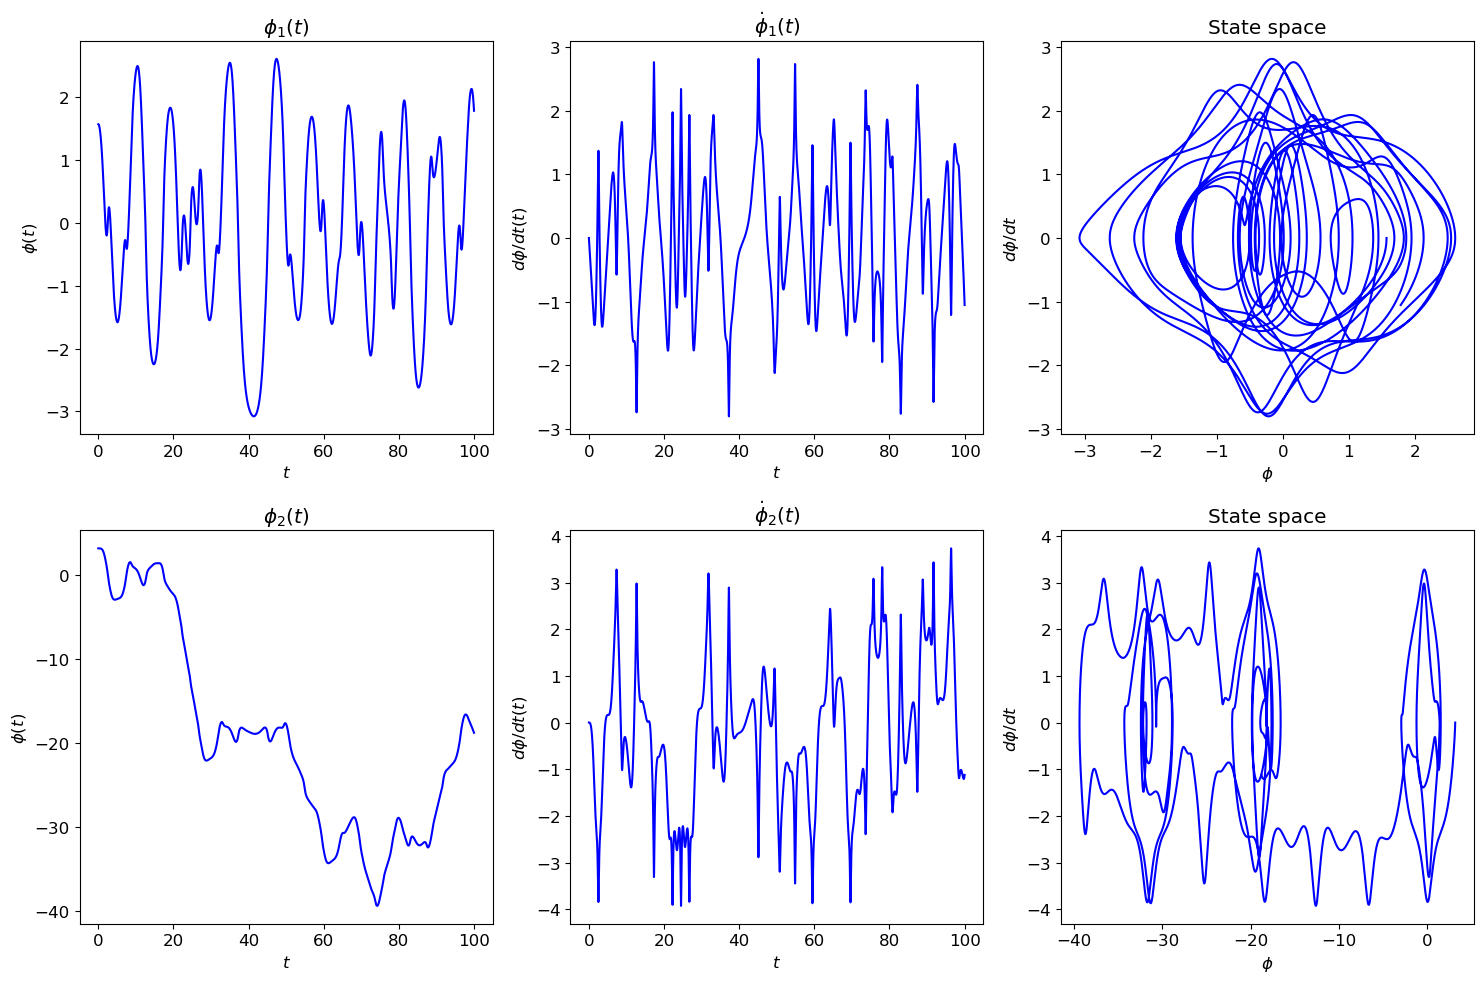

In [43]:
# both plots: same initial conditions
phi1_0 = np.pi/2
phi1_dot_0 = 0.
phi2_0 = np.pi
phi2_dot_0 = 0.
y0 = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0]

phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, y0)


# start the plot!
fig = plt.figure(figsize=(15,10))

    
# first plot: phi1 plot 
ax_a = fig.add_subplot(2,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_{1}(t)$', 
            ax=ax_a)    
                              
# second plot: phi1_dot plot 
ax_b = fig.add_subplot(2,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_dot[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_{1}(t)$', 
            ax=ax_b)    

# third plot: state space plot from t=0 to t=100
ax_c = fig.add_subplot(2,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], phi1_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='State space', 
            ax=ax_c)    

# fourth plot: phi2 plot 
ax_d = fig.add_subplot(2,3,4)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_{2}(t)$', 
            ax=ax_d)    
                              
# fifth plot: phi2_dot plot 
ax_e = fig.add_subplot(2,3,5)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2_dot[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_{2}(t)$', 
            ax=ax_e)    

# sixth plot: state space plot
ax_f = fig.add_subplot(2,3,6)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi2[start : stop], phi2_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='State space', 
            ax=ax_f)    

fig.tight_layout()
#fig.savefig('simple_pendulum_Lagrange.png', bbox_inches='tight')  

C:\Users\David Gough\AppData\Local\Temp\ipykernel_1992\1846763188.py:12: RuntimeWarning: divide by zero encountered in log
  y = np.log(abs(delta_phi))
C:\Users\David Gough\AppData\Local\Temp\ipykernel_1992\1846763188.py:20: RuntimeWarning: divide by zero encountered in log
  y = np.log(abs(delta_phi))


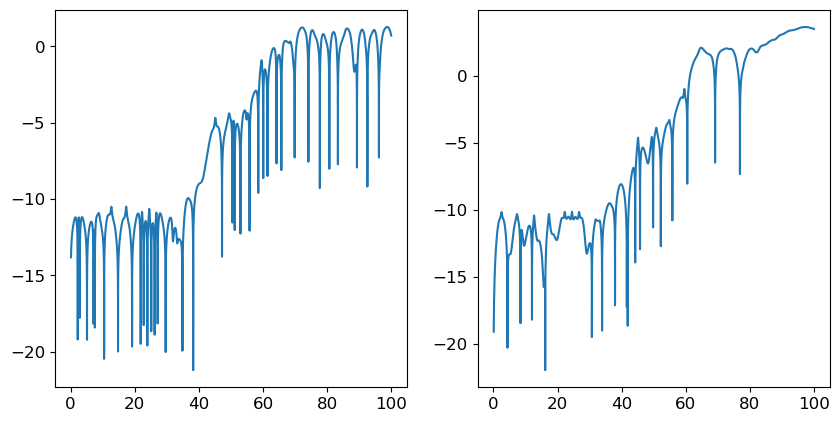

In [44]:
phi1_0 = np.pi/2
phi1_dot_0 = 10**-5
phi2_0 = np.pi
phi2_dot_0 = 0.
y0 = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0]

phi1_b, phi1_dot_b, phi2_b, phi2_dot_b = p1.solve_ode(t_pts, y0)

delta_phi = phi1 - phi1_b

fig_2 = plt.figure(figsize=(10,5))
y = np.log(abs(delta_phi))

start, stop = start_stop_indices(t_pts, 0.1, 100)

ax_g = fig_2.add_subplot(1,2,1)                  
ax_g.plot(t_pts[start : stop], y[start : stop])

delta_phi = phi2 - phi2_b
y = np.log(abs(delta_phi))

ax_h = fig_2.add_subplot(1,2,2)                  
ax_h.plot(t_pts[start : stop], y[start : stop])

As you can see above, the double penduleum is chaotic because the difference starts to increace exponentialy after around 35 seconds. This extreme senstivity to initial conditions is charcteristic of a chaotic system. Below, I plot the two. Initially, they seem to follow each other very well since the difference in initial conditions is on the order of $10^{-5}$, however, after a while, they start to diverge and end up looking nothing alike

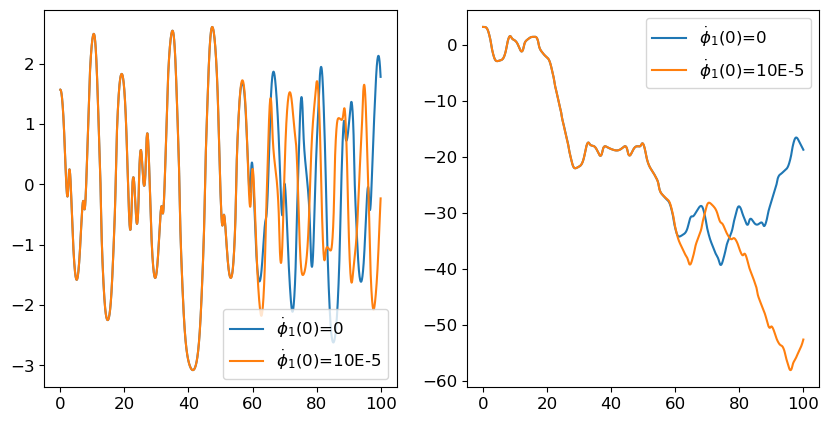

In [45]:
fig3 = plt.figure(figsize=(10,5))

ax_i = fig3.add_subplot(1,2,1)
ax_i.plot(t_pts, phi1, label=r'$\dot\phi_{1}(0)$=0')
ax_i.plot(t_pts, phi1_b, label=r'$\dot\phi_{1}(0)$=10E-5')
ax_i.legend()

ax_j = fig3.add_subplot(1,2,2)
ax_j.plot(t_pts, phi2, label=r'$\dot\phi_{1}(0)$=0')
ax_j.plot(t_pts, phi2_b, label=r'$\dot\phi_{1}(0)$=10E-5')
ax_j.legend()

In [46]:
# Import explicitly the widgets we might use (add more as needed!) 
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display

In [47]:
def update_plot(m1=1.0, m2=1., L1=1., 
                L2=1., g=1., phi1_0=np.pi/2, phi2_0=np.pi,
                lw=2, color='blue'
               ):
    """
    Update the plot, which includes a call to a function.
    Note that the entire plot is redrawn here.
    Now all the parameters controlling the plot are inputs to the function.
    """
    t_start = 0.
    t_end = 50.
    delta_t = 0.001
    
    t_pts = np.arange(t_start, t_end+delta_t, delta_t)  
    
    p3 = DoublePendulum(m1, m2, L1, L2, g)
    y0 = [phi1_0, 0, phi2_0, 0]
    
    phi1, phi1_dot, phi2, phi2_dot = p3.solve_ode(t_pts, y0)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    #line, = ax.plot(t_pts, phi1, lw=lw, color=color)
    ax.plot(t_pts, phi1, lw=lw, color=color)
    ax.plot(t_pts, phi2, lw=lw, color='red')
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$\phi(t)$')
    

In [48]:
slider_border = Layout(border='solid 1.0px')

def float_widget(value, min, max, step, description, format):
    """Makes a FloatSlider with the passed parameters and continuous_update
       set to False."""
    return FloatSlider(value=value, min=min, max=max, step=step,
                       disabled=False,
                       description=description, continuous_update=False,
                       orientation='horizontal', layout=slider_border,
                       readout=True, readout_format=format)


phi1_0w = float_widget(value=np.pi/2, min=-np.pi, max=np.pi, step=0.1,
                       description=r'$\phi_{1,0}$ :', format='.1f')

phi2_0w = float_widget(value=np.pi, min=-np.pi, max=np.pi, step=0.1,
                       description=r'$\phi_{2,0}$ :', format='.1f')

m1w = float_widget(value=1, min=0.1, max=10., step=0.1,
                       description=r'm1 :', format='.1f')

m2w = float_widget(value=1, min=0.1, max=10., step=0.1,
                       description=r'm2 :', format='.1f')

L1w = float_widget(value=1, min=0.1, max=10, step=0.1,
                       description=r'L1 :', format='.1f')

L2w = float_widget(value=1, min=0.1, max=10, step=0.1,
                        description=r'L2 :', format='.1f')

gw = float_widget(value=1, min=0.5, max=2.5, step=0.1,
                       description=r'g :', format='.1f')

In [49]:
plot_out = widgets.interactive_output(update_plot,
                                      dict(
                                      phi1_0=phi1_0w,
                                      phi2_0=phi2_0w,
                                      m1=m1w,
                                      m2=m2w,
                                      L1=L1w,
                                      g=gw,
                                      )
                                     )

In [50]:
hbox_1 = HBox([phi1_0w, phi2_0w, m1w, gw])
hbox_2 = HBox([m2w, L1w, L2w])
UI_box = VBox([hbox_1, hbox_2, plot_out])

Interactive widgit: feel free to mess with the variables. 

In [51]:
display(UI_box)   
#blue is phi1, red is phi2